In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Convert labels to NumPy arrays (if not already)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Filter for digits 0 and 1
x_train = x_train[(y_train == 0) | (y_train == 1)]
y_train= y_train[(y_train == 0) | (y_train == 1)]
x_test= x_test[(y_test == 0) | (y_test == 1)]
y_test= y_test[(y_test == 0) | (y_test == 1)]

## Feature Scaling:

#### The pixel values in the MNIST dataset range from 0 to 255. Neural networks perform better when input features are normalized.
#### Without normalization, large input values can cause the sigmoid activation function to saturate, leading to vanishing gradients.


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [10]:
y_train[:9]

array([0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=uint8)

In [14]:
print(x_train.shape)


(12665, 28, 28)


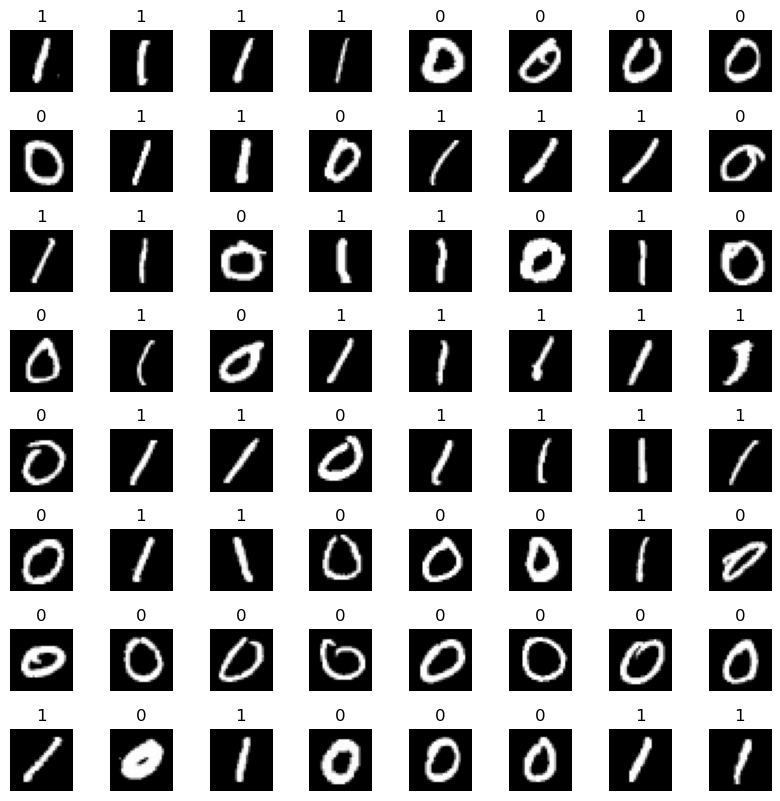

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming x_train is already loaded with shape (60000, 28, 28)
# y_train should have shape (60000, 1) or (60000,)

m = x_train.shape[0]  # Number of samples

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # Select a random index
    random_index = np.random.randint(m)
    
    # Extract and display the image
    ax.imshow(x_train[random_index], cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index])  # Ensure y_train is 1D or adapt indexing
    ax.set_axis_off()

plt.show()

In [18]:
model= Sequential([ tf.keras.layers.Flatten(input_shape=(28, 28)),   #specify input size
        ### START CODE HERE ### 
        tf.keras.layers.Dense(25, activation="sigmoid"),
        tf.keras.layers.Dense(15, activation="sigmoid"),
        tf.keras.layers.Dense(1, activation="sigmoid")
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            

E:\apps\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,031 (78.25 KB)

 Trainable params: 20,031 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
[layer1, layer2, layer3] = model.layers

ValueError: too many values to unpack (expected 3)

In [ ]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

In [22]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

model.fit(
    x_train, y_train,
    epochs=10
)

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9471 - loss: 0.3028
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9985 - loss: 0.0254
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9992 - loss: 0.0122
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9993 - loss: 0.0071
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 0.0043
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 0.0037
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0043
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 0.0023
Epoch 9/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0016
Epoch 10/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0015


In [24]:
prediction = model.predict(x_test[0].reshape(1,28,28))  # a zero
print(f" predicting a zero: {prediction} {y_test[0]}")
prediction = model.predict(x_test[500].reshape(1,28,28))  # a one
print(f" predicting a one:  {prediction} {y_test[500]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
 predicting a zero: [[0.99952304]] 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
 predicting a one:  [[0.00079865]] 0


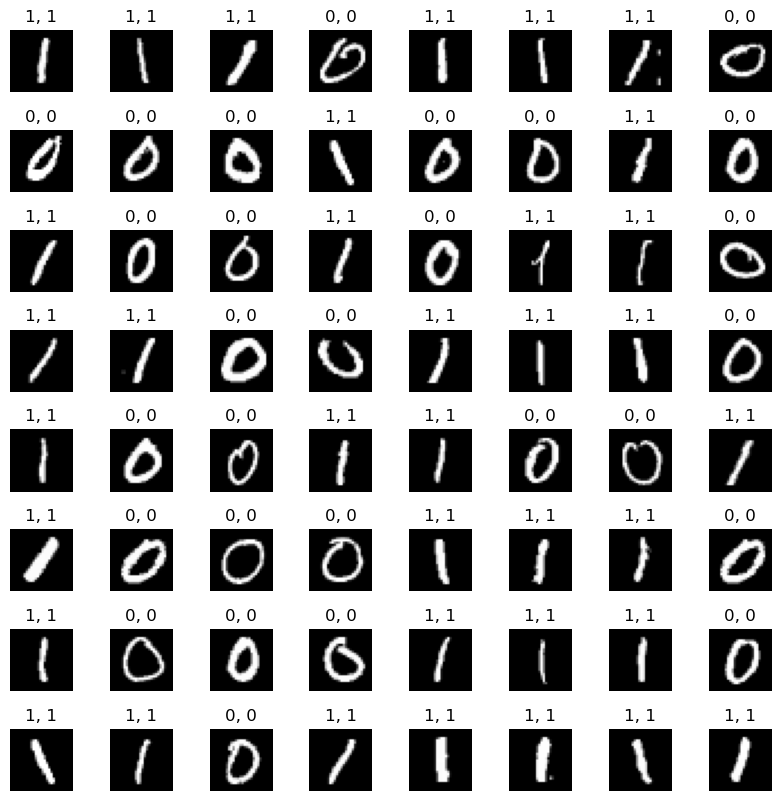

In [34]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming x_train, y_train, x_test, y_test are already preprocessed
m = x_test.shape[0]  # Number of samples

# Display random predictions with images
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    # Select a random index
    random_index = np.random.randint(m)
    
    # Extract and display the image
    ax.imshow(x_test[random_index], cmap='gray')
    
    # Make prediction
    prediction = model.predict(x_test[random_index].reshape(1, 28, 28), verbose=0)  # Remove the channel dimension
    yhat = 1 if prediction >= 0.5 else 0
    
    # Display the label above the image
    ax.set_title(f"{y_test[random_index]}, {yhat}")
    ax.set_axis_off()

plt.show()
